In [3]:
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')

# Or, to ignore specific types of warnings
# For example, to ignore FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
import os
from sklearn.impute import SimpleImputer

In [5]:
path = os.getcwd()
print(path)
os.chdir("C:/Users/USER/Downloads")
print(os.getcwd())

C:\Users\USER
C:\Users\USER\Downloads


In [6]:
#import Dataset
Crime=pd.read_csv('C:/Users/USER/Downloads/Crime_Data_from_2020_to_Present.csv', sep=',',encoding='latin-1')
Crime.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474


In [7]:
#column names

Crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [8]:
#data shape by row and column

Crime.shape

(862906, 28)

In [9]:
Crime.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.629060e+05,862906.000000,862906.000000,862906.000000,862906.000000,862906.000000,862906.000000,862886.000000,299647.000000,862896.000000,58447.000000,1742.000000,57.000000,862906.000000,862906.000000
mean,1.961506e+08,1345.993386,10.860006,1132.317284,1.419721,501.994537,29.941419,309.283723,365.876218,501.778446,957.486697,981.040184,988.508772,34.026953,-118.190290
std,4.569677e+07,651.250248,6.138097,613.639293,0.493514,209.151447,21.510678,215.650185,121.857935,208.976666,111.831431,62.503758,29.758626,1.271577,4.400756
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-12.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.766800
25%,1.620117e+08,900.000000,6.000000,625.000000,1.000000,330.000000,14.000000,102.000000,400.000000,330.000000,998.000000,998.000000,998.000000,34.010900,-118.430500
50%,2.201122e+08,1425.000000,11.000000,1162.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.059000,-118.320500
75%,2.311107e+08,1900.000000,16.000000,1655.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.166700,-118.273900
max,9.102204e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,99.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.541800,0.000000


In [10]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862906 entries, 0 to 862905
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           862906 non-null  int64  
 1   Date Rptd       862906 non-null  object 
 2   DATE OCC        862906 non-null  object 
 3   TIME OCC        862906 non-null  int64  
 4   AREA            862906 non-null  int64  
 5   AREA NAME       862906 non-null  object 
 6   Rpt Dist No     862906 non-null  int64  
 7   Part 1-2        862906 non-null  int64  
 8   Crm Cd          862906 non-null  int64  
 9   Crm Cd Desc     862906 non-null  object 
 10  Mocodes         749241 non-null  object 
 11  Vict Age        862906 non-null  int64  
 12  Vict Sex        757597 non-null  object 
 13  Vict Descent    757584 non-null  object 
 14  Premis Cd       862886 non-null  float64
 15  Premis Desc     862398 non-null  object 
 16  Weapon Used Cd  299647 non-null  float64
 17  Weapon Des

In [11]:
#check for missing values

Crime.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           113665
Vict Age               0
Vict Sex          105309
Vict Descent      105322
Premis Cd             20
Premis Desc          508
Weapon Used Cd    563259
Weapon Desc       563259
Status                 1
Status Desc            0
Crm Cd 1              10
Crm Cd 2          804459
Crm Cd 3          861164
Crm Cd 4          862849
LOCATION               0
Cross Street      727445
LAT                    0
LON                    0
dtype: int64

In [12]:
#check for duplicates

Crime.duplicated().sum()

124959

In [13]:
#drop duplicates

Drop_duplicates = Crime.drop_duplicates()

In [14]:
Drop_duplicates.duplicated().sum()

0

In [15]:
Drop_duplicates.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            94210
Vict Age               0
Vict Sex           87087
Vict Descent       87097
Premis Cd             18
Premis Desc          348
Weapon Used Cd    481059
Weapon Desc       481059
Status                 1
Status Desc            0
Crm Cd 1              10
Crm Cd 2          687974
Crm Cd 3          736538
Crm Cd 4          737900
LOCATION               0
Cross Street      619732
LAT                    0
LON                    0
dtype: int64

In [16]:
Drop = Drop_duplicates

In [17]:
#drop columns not needed in analysis

Drop = Drop.drop(columns=['Crm Cd 1'])

In [18]:
Drop = Drop.drop(columns=['Crm Cd 2'])

In [19]:
Drop = Drop.drop(columns=['Crm Cd 3'])

In [20]:
Drop = Drop.drop(columns=['Crm Cd 4'])

In [21]:
Drop.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION',
       'Cross Street', 'LAT', 'LON'],
      dtype='object')

In [22]:
dd = Drop

In [23]:
#convert date dtype to datetime

dd[["DATE OCC", "Date Rptd"]] = dd[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)


In [24]:
#count of area names

dd["AREA NAME"].value_counts()

AREA NAME
Central        57481
Southwest      48034
Hollywood      44921
77th Street    41346
Southeast      41163
Rampart        40164
West LA        37039
Wilshire       36363
Pacific        36052
Harbor         35175
N Hollywood    34212
Hollenbeck     32073
Newton         32053
Mission        30338
Olympic        29968
Topanga        29449
Northeast      29442
Van Nuys       28612
West Valley    27436
Devonshire     24883
Foothill       21743
Name: count, dtype: int64

In [25]:
# removing the values ​​below one for the "Vict Age" column
dd.drop(dd[dd['Vict Age'] < 1].index, axis=0, inplace=True)

In [26]:
dd["Crm Cd Desc"].value_counts()

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                              62169
BURGLARY FROM VEHICLE                                 49774
THEFT OF IDENTITY                                     43346
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        37776
INTIMATE PARTNER - SIMPLE ASSAULT                     36235
                                                      ...  
LYNCHING                                                  2
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        2
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)              2
TRAIN WRECKING                                            1
DISHONEST EMPLOYEE ATTEMPTED THEFT                        1
Name: count, Length: 136, dtype: int64

In [27]:
dd["Status"].value_counts()

Status
IC    450719
AO     67862
AA     49101
JA      2520
JO      1216
CC         5
Name: count, dtype: int64

In [28]:
dd['Vict Descent'].fillna('N/A', inplace=True)

In [29]:
dd["Status Desc"].value_counts()

Status Desc
Invest Cont     450719
Adult Other      67862
Adult Arrest     49101
Juv Arrest        2520
Juv Other         1216
UNK                  5
Name: count, dtype: int64

In [30]:
dd["LOCATION"].value_counts()

LOCATION
800 N  ALAMEDA                      ST     1177
7TH                                        1146
6TH                          ST            1118
6TH                                        1082
7TH                          ST            1079
                                           ... 
6100    4TH                          AV       1
7900    FAUST                        AV       1
8000    FENWICK                      ST       1
8400    SHOUP                        AV       1
3600    COLISEUM                     ST       1
Name: count, Length: 58901, dtype: int64

In [31]:
dd.groupby(['Weapon Desc'])['DR_NO'].count().reset_index().sort_values(by='DR_NO', ascending=False)

,Weapon Desc,DR_NO
62,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",135792
72,UNKNOWN WEAPON/OTHER WEAPON,23296
75,VERBAL THREAT,18459
27,HAND GUN,13364
32,KNIFE WITH BLADE 6INCHES OR LESS,4701
...,...,...
46,RELIC FIREARM,8
1,ANTIQUE FIREARM,7
38,MARTIAL ARTS WEAPONS,5
35,MAC-10 SEMIAUTOMATIC ASSAULT WEAPON,2


In [32]:
dd.groupby(['Vict Sex'])['DR_NO'].count().reset_index().sort_values(by='DR_NO', ascending=False)

,Vict Sex,DR_NO
3,M,283838
1,F,280490
4,X,7019
2,H,49
0,-,1


In [33]:
dd[["AREA NAME","Weapon Desc", "LOCATION"]]

,AREA NAME,Weapon Desc,LOCATION
0,Southwest,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL
1,Central,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST
3,N Hollywood,NaN,5400 CORTEEN PL
4,Mission,NaN,14400 TITUS ST
5,Central,UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY
...,...,...,...
862895,West LA,NaN,2000 S HOLT AV
862897,West LA,NaN,10200 SANTA MONICA BL
862903,Central,NaN,500 S MAIN ST
862904,Van Nuys,NaN,14500 HARTLAND ST


In [34]:
#average victim age
round(dd["Vict Age"].mean(),0)

39.0

In [35]:
duplicate_rows = dd[dd.duplicated()]
duplicate_rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
664507,231115064,2023-10-28,2023-07-29,2300,11,Northeast,1161,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1100 N KENMORE AV,NaN,34.0908,-118.2974
672264,231304736,2023-01-15,2023-01-15,815,13,Newton,1321,1,815,SEXUAL PENETRATION W/FOREIGN OBJECT,...,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,500 W 21ST ST,NaN,34.0317,-118.2722


In [36]:
Data_without_duplicates = dd.drop_duplicates()


In [37]:
data = Data_without_duplicates

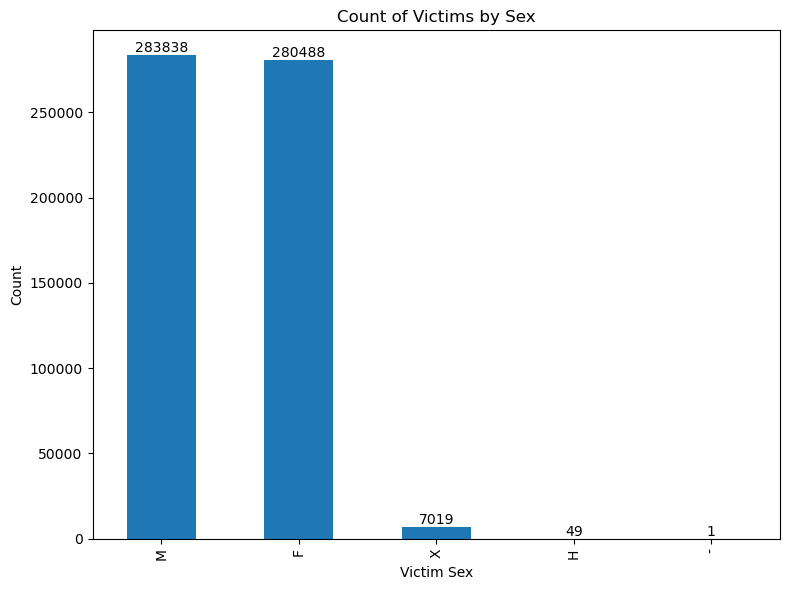

In [38]:
sex_counts = data['Vict Sex'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar')

# Adding labels and title
plt.title('Count of Victims by Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')

# Adding labels to each bar
for i, count in enumerate(sex_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

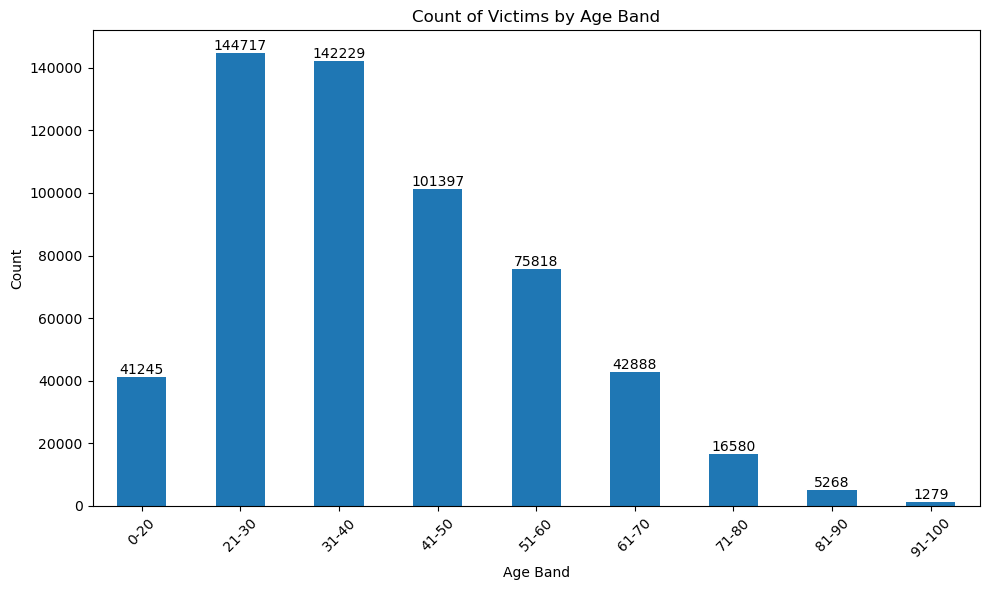

In [39]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

data.loc[:, 'Age Band'] = pd.cut(data['Vict Age'], bins=age_bins, labels=labels, right=False)

# Calculate value counts for age bands
age_counts = data['Age Band'].value_counts()

# Sort age bands
age_counts = age_counts.sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')

# Adding labels and title
plt.title('Count of Victims by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Count')

# Adding labels to each bar
for i, count in enumerate(age_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

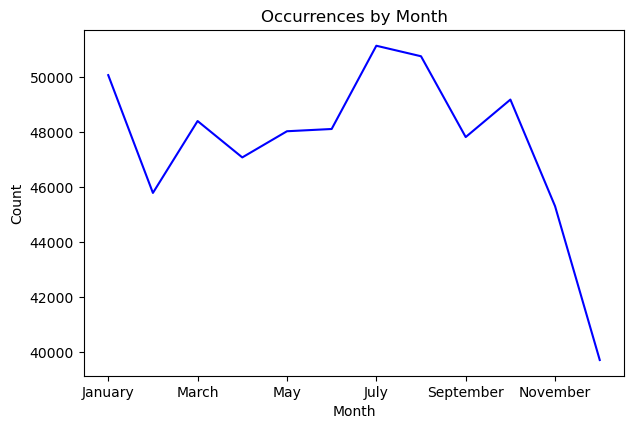

In [40]:
data.loc[:, 'DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Extract month name using .loc
data.loc[:, 'Month Name'] = data['DATE OCC'].dt.strftime('%B')

# Extract month, quarter, day, and year
data.loc[:, 'Month'] = data['DATE OCC'].dt.month
data.loc[:, 'Quarter'] = data['DATE OCC'].dt.quarter
data.loc[:, 'Day'] = data['DATE OCC'].dt.day
data.loc[:, 'Year'] = data['DATE OCC'].dt.year

# Calculate counts for each date component
month_counts = data['Month'].value_counts().sort_index()
quarter_counts = data['Quarter'].value_counts().sort_index()
day_counts = data['Day'].value_counts().sort_index()
year_counts = data['Year'].value_counts().sort_index()

# Plotting the line charts
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
# Replace numerical month values with month names
month_counts.index = [pd.Timestamp(2022, month, 1).strftime('%B') for month in month_counts.index]
month_counts.plot(kind='line', color='blue')
plt.title('Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

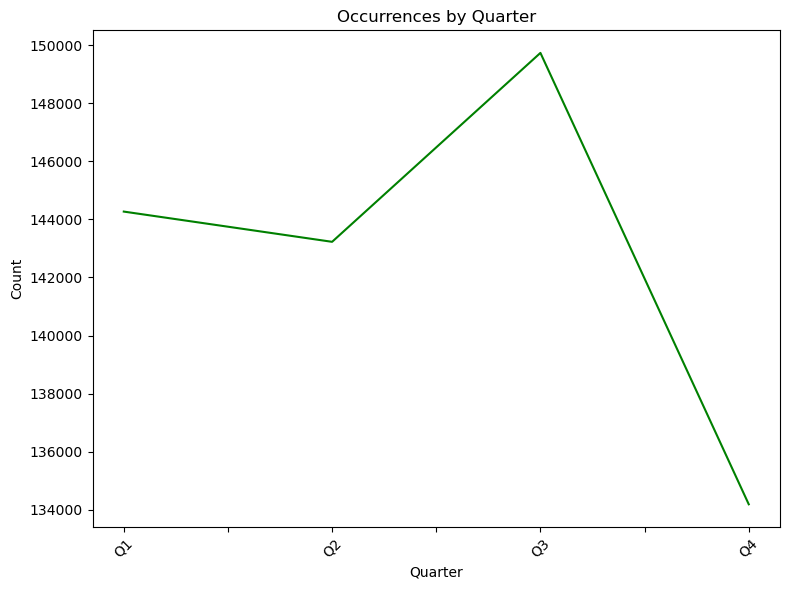

In [41]:
data.loc[:, 'DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Extract quarter
data.loc[:, 'Quarter'] = data['DATE OCC'].dt.quarter

# Calculate counts for each quarter
quarter_counts = data['Quarter'].value_counts().sort_index()

# Plotting the line chart for quarters
plt.figure(figsize=(8, 6))

# Replace numerical quarter values with quarter names
quarter_counts.index = ['Q1', 'Q2', 'Q3', 'Q4']

quarter_counts.plot(kind='line', color='green')
plt.title('Occurrences by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

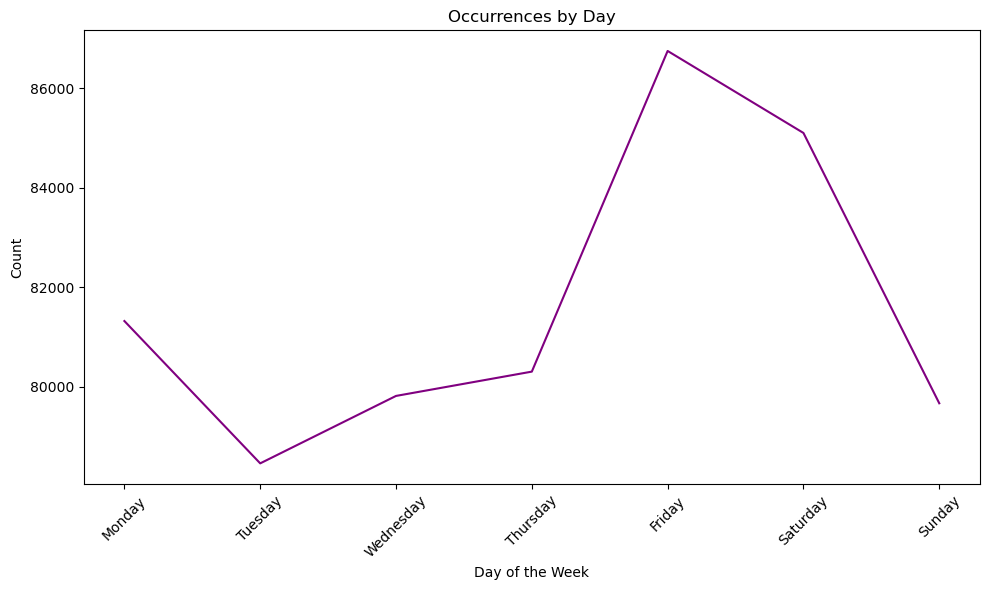

In [42]:
data = data.copy()  # Create a copy of the DataFrame to avoid SettingWithCopyWarning

data.loc[:, 'DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Extract day name
data.loc[:, 'Day Name'] = data['DATE OCC'].dt.strftime('%A')

# Calculate counts for each day
day_counts = data['Day Name'].value_counts().sort_index()

day_counts = day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the line chart for days with day names
plt.figure(figsize=(10, 6))

day_counts.plot(kind='line', color='purple')
plt.title('Occurrences by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

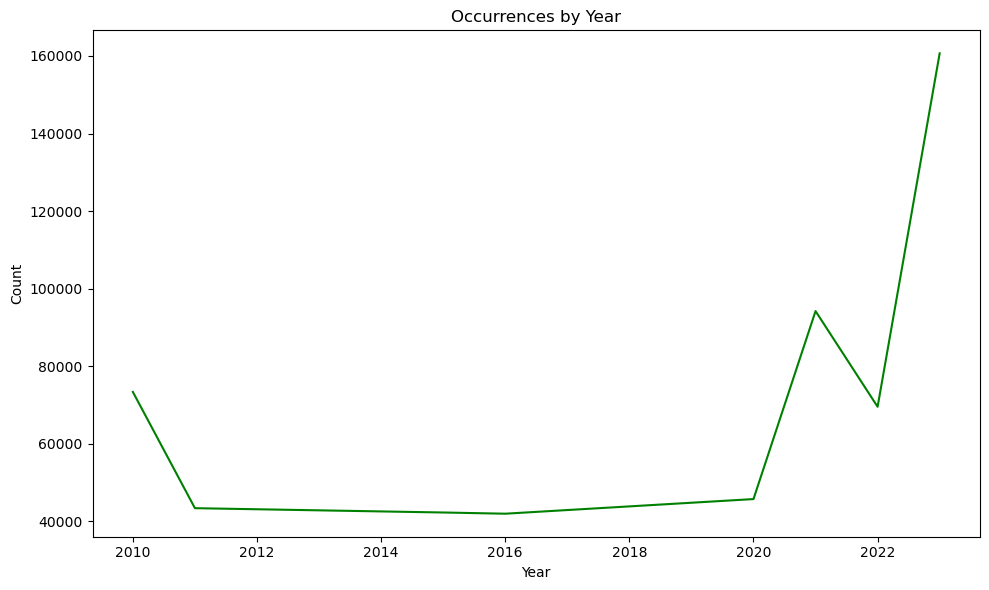

In [43]:
data.loc[:, 'DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Extract year
data.loc[:, 'Year'] = data['DATE OCC'].dt.year

# Calculate counts for each year
year_counts = data['Year'].value_counts().sort_index()

# Plotting the line chart for counts by year
plt.figure(figsize=(10, 6))

year_counts.plot(kind='line', color='green')
plt.title('Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

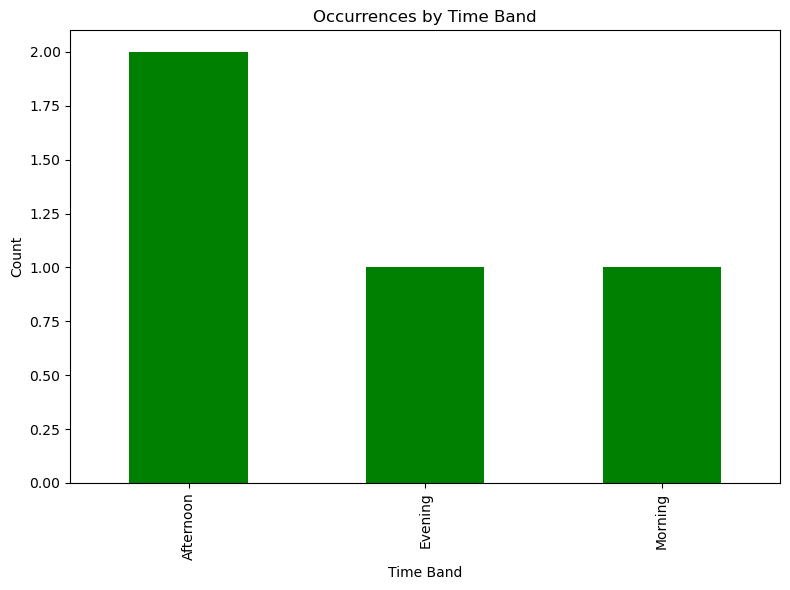

In [44]:
Data = {'TIME OCC': ["2230", "1345", "0830", "1740"]}
df = pd.DataFrame(Data)

# Convert time data to datetime format
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M').dt.time

# Define function to categorize time into bands
def categorize_time(time):
    hour = time.hour
    if hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to create a new column for time bands
df['Time Band'] = df['TIME OCC'].apply(categorize_time)

# Calculate counts for each time band
time_band_counts = df['Time Band'].value_counts()

# Plotting the bar chart for time bands
plt.figure(figsize=(8, 6))

time_band_counts.plot(kind='bar', color='green')
plt.title('Occurrences by Time Band')
plt.xlabel('Time Band')
plt.ylabel('Count')

plt.tight_layout()
plt.show()